### **Import Libraries**

In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.tree import export_graphviz
import cv2

### **Upload Datasets**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving symptom_Description.csv to symptom_Description.csv
Saving symptom_precaution.csv to symptom_precaution.csv
Saving pre_processed.csv to pre_processed.csv
Saving Symptom-severity.csv to Symptom-severity.csv


In [3]:
df = pd.read_csv('pre_processed.csv')
df1 = pd.read_csv('Symptom-severity.csv')
df2 = pd.read_csv('symptom_Description.csv')
df3 = pd.read_csv('symptom_precaution.csv')

###**Data Pre-processing**

In [11]:
print(df.shape)

(4920, 132)


In [12]:
print(df.isnull().sum())

 abdominal pain           0
 abnormal menstruation    0
 acidity                  0
 acute liver failure      0
 altered sensorium        0
                         ..
 yellow urine             0
 yellowing of eyes        0
 yellowish skin           0
itching                   0
Disease                   0
Length: 132, dtype: int64


In [13]:
df.columns

Index([' abdominal pain', ' abnormal menstruation', ' acidity',
       ' acute liver failure', ' altered sensorium', ' anxiety', ' back pain',
       ' belly pain', ' blackheads', ' bladder discomfort',
       ...
       ' weakness in limbs', ' weakness of one body side', ' weight gain',
       ' weight loss', ' yellow crust ooze', ' yellow urine',
       ' yellowing of eyes', ' yellowish skin', 'itching', 'Disease'],
      dtype='object', length=132)

In [14]:
df.columns = df.columns.str.strip()

In [15]:
df.columns

Index(['abdominal pain', 'abnormal menstruation', 'acidity',
       'acute liver failure', 'altered sensorium', 'anxiety', 'back pain',
       'belly pain', 'blackheads', 'bladder discomfort',
       ...
       'weakness in limbs', 'weakness of one body side', 'weight gain',
       'weight loss', 'yellow crust ooze', 'yellow urine', 'yellowing of eyes',
       'yellowish skin', 'itching', 'Disease'],
      dtype='object', length=132)

In [16]:
df.head()

,abdominal pain,abnormal menstruation,acidity,acute liver failure,altered sensorium,anxiety,back pain,belly pain,blackheads,bladder discomfort,...,weakness in limbs,weakness of one body side,weight gain,weight loss,yellow crust ooze,yellow urine,yellowing of eyes,yellowish skin,itching,Disease
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Acne
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Acne
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Hyperthyroidism
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Chronic cholestasis


### **Model Training**

In [18]:
X=df.drop(['Disease'], axis=1)
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)

In [20]:
knn_predictions = knn.predict(X_test)

In [21]:
print("Accuracy:",accuracy_score(y_test, knn_predictions))
print('F1-score:', f1_score(y_test, knn_predictions, average='macro'))

Accuracy: 0.9979674796747967
F1-score: 0.9750566893424035


<Axes: >

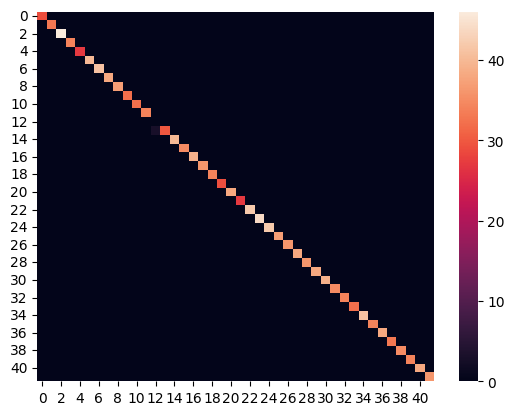

In [22]:
conf_mat = confusion_matrix(y_test, knn_predictions)
df_cm = pd.DataFrame(conf_mat)
sns.heatmap(df_cm)

In [23]:
SVM_init = SVC()
model_SVM_init = SVM_init.fit(X_train, y_train)

SVM_predictions = model_SVM_init.predict(X_test)

In [24]:
print(SVM_init)
print(classification_report(y_test, SVM_predictions))

SVC()
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        29
                                   AIDS       1.00      1.00      1.00        33
                                   Acne       1.00      1.00      1.00        46
                    Alcoholic hepatitis       1.00      1.00      1.00        34
                                Allergy       1.00      1.00      1.00        27
                              Arthritis       1.00      1.00      1.00        40
                       Bronchial Asthma       1.00      1.00      1.00        41
                   Cervical spondylosis       1.00      1.00      1.00        38
                            Chicken pox       1.00      1.00      1.00        37
                    Chronic cholestasis       1.00      1.00      1.00        32
                            Common Cold       1.00      1.00      1.00        32
                     

<Axes: >

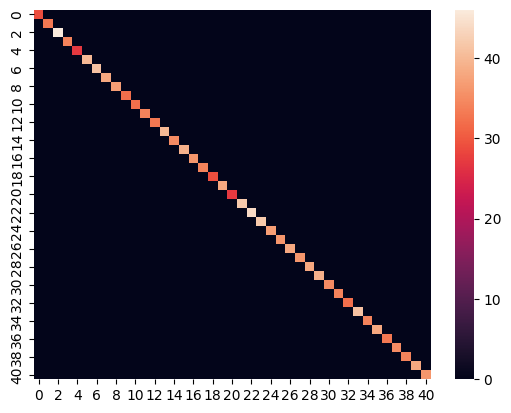

In [26]:
conf_mat = confusion_matrix(y_test, SVM_predictions)
df_cm = pd.DataFrame(conf_mat)
sns.heatmap(df_cm)